In [5]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib as mlab
import matplotlib.pyplot as plt
import xarray as xr
import os as os
import matplotlib.gridspec as gridspec

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from plot_tools import *

# Helper functions......

def add_fhour(ds):
    
    filename = ds.encoding["source"].split("_")
    
    init_time = int(filename[-2])
    fhour     = int(filename[-1][-5:-3])
        
    ds.coords['fhour'] = fhour
    ds.coords['init_time'] = init_time
    
    return ds
    

def open_mfdataset_list(data_dir, pattern):
    """
    Use xarray.open_mfdataset to read multiple netcdf files from a list.
    """
    filelist = os.path.join(data_dir,pattern)
    return xr.open_mfdataset(filelist, preprocess=add_fhour, combine='nested', concat_dim=['fhour'],parallel=True)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



Plot Lat Min: 39.0  Lat Max:  44.0  

Plot Lon Min: -92.0  Lon Max:  -86.0


Plot Lat Min: 39.0  Lat Max:  44.0  

Plot Lon Min: -92.0  Lon Max:  -86.0



/Users/Louis.Wicker/miniconda3/envs/mypip/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/Louis.Wicker/miniconda3/envs/mypip/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/Louis.Wicker/miniconda3/envs/mypip/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/Users/Louis.Wic

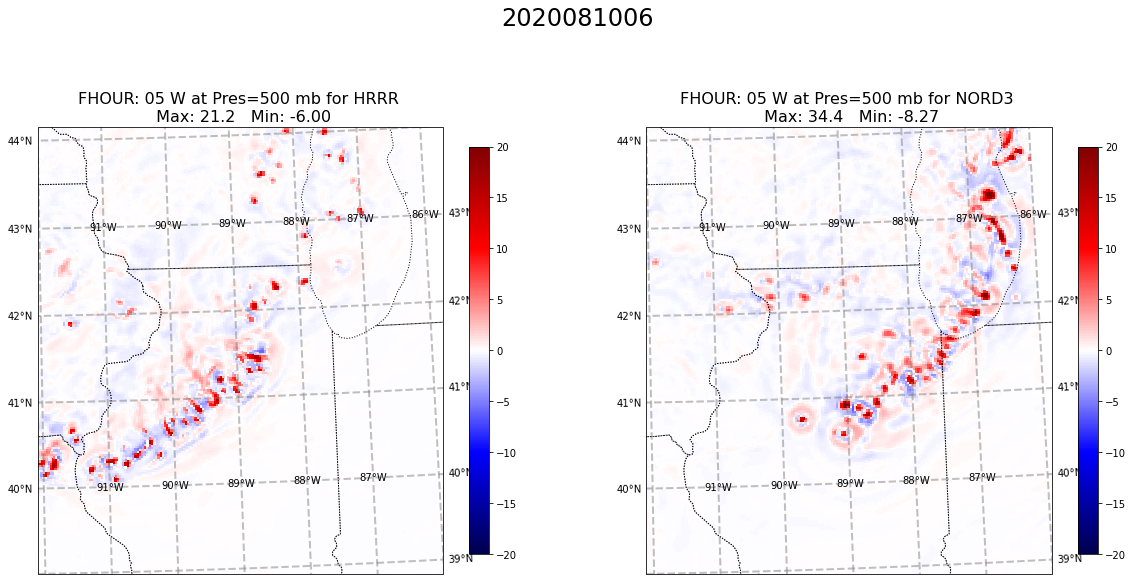

In [78]:
# List data sets

main_dir = "/Users/Louis.Wicker/CAM_Case_Studies"

day      = "2020081006"

#------------------------------------------------------------------------------------
# cut and past from below here
#

hrrr_dir  = str(os.path.join(main_dir, day, "hrrr"))
rrfs1_dir = str(os.path.join(main_dir, day, "nord3"))

# Open data sets

hrrr  = open_mfdataset_list(hrrr_dir , "region_*.nc")
rrfs1 = open_mfdataset_list(rrfs1_dir, "region_*.nc")

# Set up cartopy stuff here, so the plot routine is already set to use it.

fig, axes = init_cartopy_plot(ncols=2, nrows=1, figsize=(20,10))

klevel = 20

fhour = 5

vmin = -20.
vmax = 20.0
colormap = 'seismic'

newlat = [39.,44.]
newlon = [-92.,-86.]
contours = [-5., 5.]
contours = None

# Plot the HRRR and RRFS data

cb_info = plot_w_from_xarray(hrrr, fhour = fhour, klevel=klevel, title='HRRR', ax = axes[0], vmax=vmax, vmin=vmin, colormap=colormap, \
                            newlat=newlat, newlon=newlon, contours=contours)

cb_info = plot_w_from_xarray(rrfs1, fhour = fhour, klevel=klevel, title='NORD3', ax = axes[1], vmax=vmax, vmin=vmin, colormap=colormap, \
                            newlat=newlat, newlon=newlon, contours=contours)

plt.suptitle(day, fontsize=24)

# fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20,4))

# hrrr = hrrr.where( (newlat[0] < hrrr.lats) & (hrrr.lats < newlat[1])
#                  & (newlon[0] < hrrr.lons) & (hrrr.lons < newlon[1]), drop=True)

# w = np.nan_to_num(hrrr.W.isel(fhour=fhour, nz=klevel))
# ji = np.unravel_index(w.argmax(), w.shape)
# print(ji)
# axes[0].plot(np.arange(w.shape[1]), w[ji[0],:], color='k')
# axes[0].set_title('HRRR South-North Max Updraft Profile')
# axes[0].set_ylim(vmin,vmax)

# rrfs1 = rrfs1.where( (newlat[0] < rrfs1.lats) & (rrfs1.lats < newlat[1])
#                  & (newlon[0] < rrfs1.lons) & (rrfs1.lons < newlon[1]), drop=True)


# w = np.nan_to_num(rrfs1.W.isel(fhour=fhour, nz=klevel).values)
# ji = np.unravel_index(w.argmax(), w.shape)
# print(ji)
# axes[1].plot(np.arange(w.shape[1]), w[ji[0],:], color='k')
# axes[1].set_title("RRFS South-North Max Updraft Profile")
# axes[1].set_ylim(vmin,vmax)

plt.savefig("%s_W_%3.3d_zoom.pdf" % (os.path.join(main_dir, day), hrrr.pres[klevel]/100),bbox_inches='tight')

plt.show()


Plot Lat Min: 44.0  Lat Max:  48.0  

Plot Lon Min: -92.0  Lon Max:  -87.0


Plot Lat Min: 44.0  Lat Max:  48.0  

Plot Lon Min: -92.0  Lon Max:  -87.0



/Users/Louis.Wicker/miniconda3/envs/mypip/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/Louis.Wicker/miniconda3/envs/mypip/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/Louis.Wicker/miniconda3/envs/mypip/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/Users/Louis.Wic

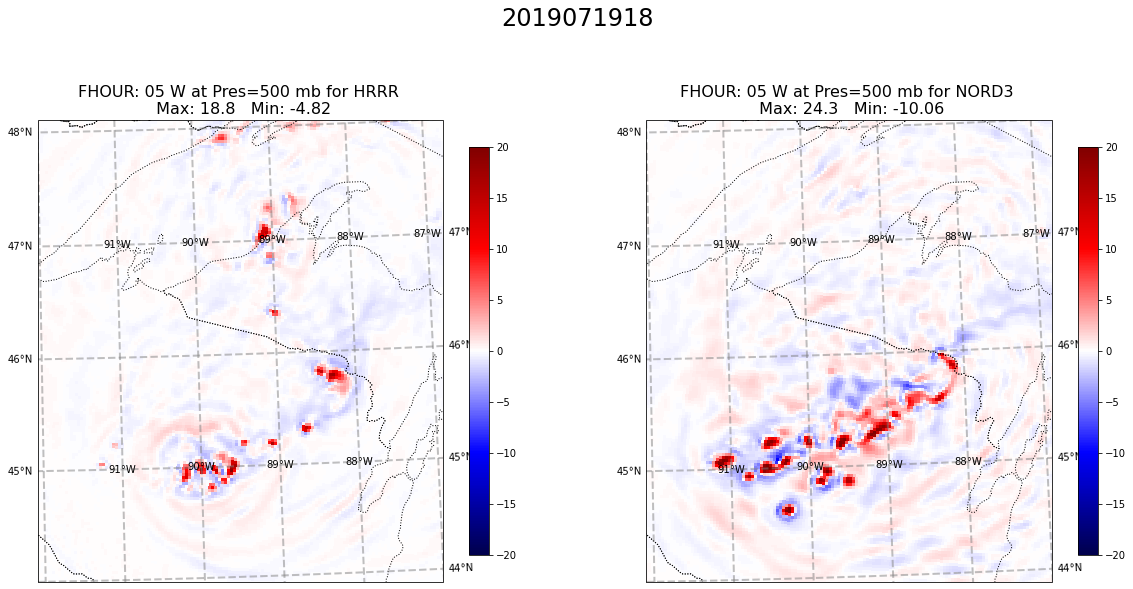

In [76]:
# List data sets

main_dir = "/Users/Louis.Wicker/CAM_Case_Studies"

day      = "2019071918"

#------------------------------------------------------------------------------------
# cut and past from below here
#

hrrr_dir  = str(os.path.join(main_dir, day, "hrrr"))
rrfs1_dir = str(os.path.join(main_dir, day, "nord3"))

# Open data sets

hrrr  = open_mfdataset_list(hrrr_dir , "region_*.nc")
rrfs1 = open_mfdataset_list(rrfs1_dir, "region_*.nc")

# Set up cartopy stuff here, so the plot routine is already set to use it.

fig, axes = init_cartopy_plot(ncols=2, nrows=1, figsize=(20,10))

klevel = 20

fhour = 5

vmin = -20.
vmax = 20.0
colormap = 'seismic'

newlat = [44.,48.]
newlon = [-92.,-87.]

# Plot the HRRR and RRFS data

cb_info = plot_w_from_xarray(hrrr, fhour = fhour, klevel=klevel, title='HRRR', ax = axes[0], vmax=vmax, vmin=vmin, colormap=colormap, \
                            newlat=newlat, newlon=newlon)

cb_info = plot_w_from_xarray(rrfs1, fhour = fhour, klevel=klevel, title='NORD3', ax = axes[1], vmax=vmax, vmin=vmin, colormap=colormap, \
                            newlat=newlat, newlon=newlon)

plt.suptitle(day, fontsize=24)

# fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20,4))

# hrrr = hrrr.where( (newlat[0] < hrrr.lats) & (hrrr.lats < newlat[1])
#                  & (newlon[0] < hrrr.lons) & (hrrr.lons < newlon[1]), drop=True)

# w = np.nan_to_num(hrrr.W.isel(fhour=fhour, nz=klevel))
# ji = np.unravel_index(w.argmax(), w.shape)
# print(ji)
# axes[0].plot(np.arange(w.shape[1]), w[ji[0],:], color='k')
# axes[0].set_title('HRRR South-North Max Updraft Profile')
# axes[0].set_ylim(vmin,vmax)

# rrfs1 = rrfs1.where( (newlat[0] < rrfs1.lats) & (rrfs1.lats < newlat[1])
#                  & (newlon[0] < rrfs1.lons) & (rrfs1.lons < newlon[1]), drop=True)


# w = np.nan_to_num(rrfs1.W.isel(fhour=fhour, nz=klevel).values)
# ji = np.unravel_index(w.argmax(), w.shape)
# print(ji)
# axes[1].plot(np.arange(w.shape[1]), w[ji[0],:], color='k')
# axes[1].set_title("RRFS South-North Max Updraft Profile")
# axes[1].set_ylim(vmin,vmax)

# plt.savefig("%s_W_%3.3d_zoom.pdf" % (os.path.join(main_dir, day), hrrr.pres[klevel]/100),bbox_inches='tight')

# plt.show()

plt.savefig("%s_W_%3.3d_zoom.pdf" % (os.path.join(main_dir, day), hrrr.pres[klevel]/100),bbox_inches='tight')


Plot Lat Min: 34.4  Lat Max:  48.5  

Plot Lon Min: -100.5  Lon Max:  -83.7


Plot Lat Min: 34.4  Lat Max:  48.5  

Plot Lon Min: -100.5  Lon Max:  -83.7



/Users/Louis.Wicker/miniconda3/envs/mypip/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/Louis.Wicker/miniconda3/envs/mypip/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/Louis.Wicker/miniconda3/envs/mypip/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/Users/Louis.Wic

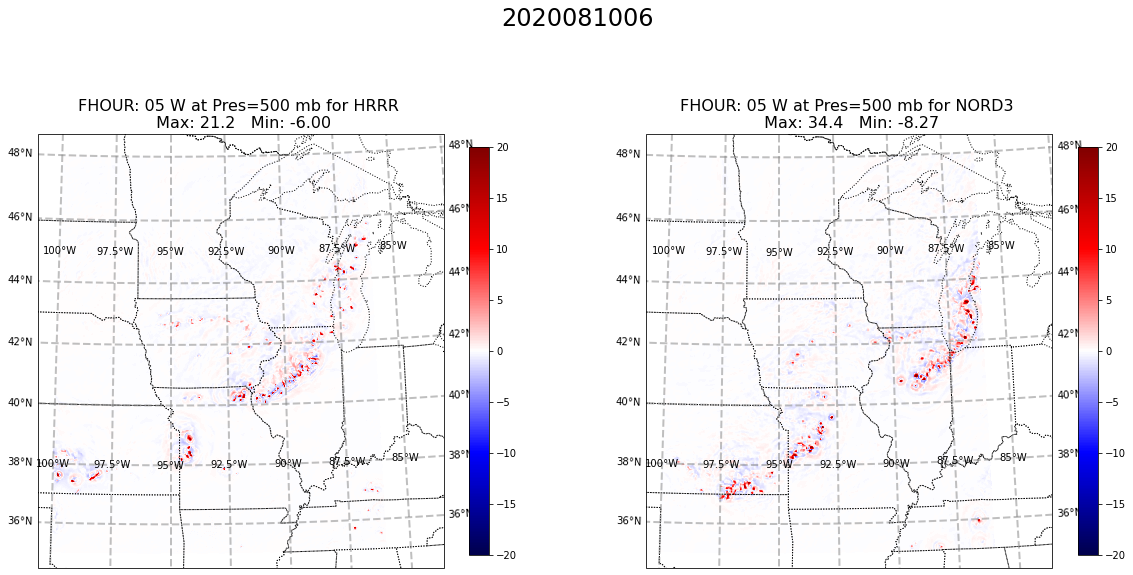

In [29]:
# List data sets

main_dir = "/Users/Louis.Wicker/CAM_Case_Studies"

day      = "2020081006"

#------------------------------------------------------------------------------------
# cut and past from below here
#

hrrr_dir  = str(os.path.join(main_dir, day, "hrrr"))
rrfs1_dir = str(os.path.join(main_dir, day, "nord3"))

# Open data sets

hrrr  = open_mfdataset_list(hrrr_dir , "region_*.nc")
rrfs1 = open_mfdataset_list(rrfs1_dir, "region_*.nc")

# Set up cartopy stuff here, so the plot routine is already set to use it.

fig, axes = init_cartopy_plot(ncols=2, nrows=1, figsize=(20,10))

klevel = 20

fhour = 5

vmin = -20.
vmax = 20.0
colormap = 'seismic'

newlat = [44.,48.]
newlon = [-92.,-87.]

newlat = None
newlon = None

# Plot the HRRR and RRFS data

cb_info = plot_w_from_xarray(hrrr, fhour = fhour, klevel=klevel, title='HRRR', ax = axes[0], vmax=vmax, vmin=vmin, colormap=colormap, \
                            newlat=newlat, newlon=newlon)

cb_info = plot_w_from_xarray(rrfs1, fhour = fhour, klevel=klevel, title='NORD3', ax = axes[1], vmax=vmax, vmin=vmin, colormap=colormap, \
                            newlat=newlat, newlon=newlon)

plt.suptitle(day, fontsize=24)

plt.savefig("%s_W_%3.3d_zoom.pdf" % (os.path.join(main_dir, day), hrrr.pres[klevel]/100),bbox_inches='tight')

In [ ]:
# List data sets

main_dir = "/Users/Louis.Wicker/CAM_Case_Studies"

day      = "2020081006"

#------------------------------------------------------------------------------------
# cut and past from below here
#

hrrr_dir  = str(os.path.join(main_dir, day, "hrrr"))
rrfs0_dir = str(os.path.join(main_dir, day, "ctrl"))
rrfs1_dir = str(os.path.join(main_dir, day, "nord3"))

# Open data sets

hrrr  = open_mfdataset_list(hrrr_dir , "region_*.nc")
rrfs0 = open_mfdataset_list(rrfs0_dir, "region_*.nc")
rrfs1 = open_mfdataset_list(rrfs1_dir, "region_*.nc")

# Loop over the analy_klevels to create multiple plots

for k in analy_klevels:
    klevels = [k-2, k-1, k, k+1, k+2]

    # Convert to numpy arrays, fill in zeros, compute horizontal TKE.

    hrrr_u = np.nan_to_num(hrrr.U.isel(nz=klevels).values).astype('float64')
    hrrr_v = np.nan_to_num(hrrr.V.isel(nz=klevels).values).astype('float64')
    hrrr_w = np.nan_to_num(hrrr.W.isel(nz=klevels).values).astype('float64')

    hrrr_tk2 = 0.5*(hrrr_u**2 + hrrr_v**2)


    rrfs0_u = np.nan_to_num(rrfs0.U.isel(nz=klevels).values).astype('float64')
    rrfs0_v = np.nan_to_num(rrfs0.V.isel(nz=klevels).values).astype('float64')
    rrfs0_w = np.nan_to_num(rrfs0.W.isel(nz=klevels).values).astype('float64')

    rrfs0_tk2 = 0.5*(rrfs0_u**2 + rrfs0_v**2)

    rrfs1_u = np.nan_to_num(rrfs1.U.isel(nz=klevels).values).astype('float64')
    rrfs1_v = np.nan_to_num(rrfs1.V.isel(nz=klevels).values).astype('float64')
    rrfs1_w = np.nan_to_num(rrfs1.W.isel(nz=klevels).values).astype('float64')

    rrfs1_tk2 = 0.5*(rrfs1_u**2 + rrfs1_v**2)

    # Compute spectra...

    fig = plt.figure(constrained_layout=True,figsize=(20,10))

    ylim = 1.0e4
    axis = 0
    func = get_spectra2D_POWSPEC

    gs = gridspec.GridSpec(1, 2, figure=fig)

    ax1 = fig.add_subplot(gs[0, 0])

    plot_spectra(rrfs0_w, func=func, axis=axis, ax=[ax1], legend='', PScolor='b', ylim=[1,ylim], LinsborgSlope=True)
    plot_spectra(rrfs1_w, func=func, axis=axis, ax=[ax1], legend='', PScolor='r', ylim=[1,ylim])
    plot_spectra(hrrr_w,  func=func, axis=axis, ax=[ax1], legend='HRRR:black\nCTRL:blue\nNORD3:red', ptitle = 'W Pow_Spec', ylim=[1,ylim])

    ax1 = fig.add_subplot(gs[0, 1])
    ylim = 1.0e10

    plot_spectra(rrfs0_tk2, func=func, axis=axis, ax=[ax1], legend='', PScolor='b', ylim=[1,ylim], LinsborgSlope=True)
    plot_spectra(rrfs1_tk2, func=func, axis=axis, ax=[ax1], legend='', PScolor='r', ylim=[1,ylim])
    plot_spectra(hrrr_tk2,  func=func, axis=axis, ax=[ax1], legend='HRRR:black\nCTRL:blue\nNORD3:red', ptitle = 'Hor. TKE Pow_Spec', ylim=[1,ylim])

    plt.suptitle("CASE DAY: %s_%s_%s %s UTC \n Pressure Level: %d hPa" % (day[0:4],day[4:6],day[6:8],day[8:10],hrrr.pres[k]/100), fontsize=20)

    plt.savefig("%s/spectra_%3.3d_hPa.pdf" % (os.path.join(main_dir, day), hrrr.pres[k]/100),bbox_inches='tight')

    plt.show()

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from filter.RaymondFilters import RaymondFilter6, RaymondFilter10
from plot_tools import *

# Set up cartopy stuff here, so the plot routine is already set to use it.

fig, axes = init_cartopy_plot(ncols=3, nrows=1, figsize=(30,10))

# Plot the HRRR and RRFS data

cb_info = plot_w_from_xarray(hrrr, klevel=klevel, title='HRRR', ax = axes[0])

cb_info = plot_w_from_xarray(rrfs0, klevel=klevel, title='ctrl', ax =  axes[1])
cb_info = plot_w_from_xarray(rrfs1, klevel=klevel, title='nord3', ax = axes[2])
